In [7]:
from scipy.optimize import minimize, leastsq
import numpy as np
import pandas as pd
from scipy.integrate import quad, solve_ivp
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [3]:
a = 0.5
b = 0.3
N = 1000000
S_0 = 990000
I_0 = 7000
R_0 = 3000
t_0, t_f = 0,25

t = np.linspace(t_0, t_f, 2000)
y = np.array([9.90000000e+05, 9.34741505e+05, 5.26338915e+05, 2.14449863e+05,
        8.92016780e+04, 3.70563463e+04, 1.53952532e+04, 6.39600686e+03,
        2.65724217e+03, 1.10395999e+03, 4.58643792e+02, 1.90545047e+02,
        7.91625391e+01, 3.28883086e+01, 1.36635268e+01, 5.67652784e+00,
        3.71298656e+00])

In [4]:
def dsdt(t, S):
    return (-(a * S))


sol_s = solve_ivp(dsdt, (t_0, t_f), [S_0], dense_output=True)
t_s, y_s = sol_s.t, sol_s.y[0]
z_s, = sol_s.sol(t_s)
def func_s(t, s, a):
  return s * np.exp(-a*t)


def diff_s(p, y, t):
  s, a = p
  return y - func_s(t, s, a)

p0 = S_0, a 
apr_s, _ = leastsq(diff_s, p0, args=(y_s, t_s))

In [5]:
def didt(t, I):
  return a*sol_s.sol(t) - b*I

sol_i = solve_ivp(didt, (t_0, t_f), [I_0], dense_output=True)
t_i, y_i = sol_i.t, sol_i.y[0]

def func_i(t, s, i, a):
  return (i + a * s * t) * np.exp(-a*t)


def diff_i(p, y, t):
  s, i, a = p
  return y - func_i(t, s, i, a)

p_I = S_0, I_0, a
apr_i, _ = leastsq(diff_i, p_I, args=(y_i, t_i))

In [8]:
def func_r(t):
  return N - func_s(t, *apr_s) - func_i(t, *apr_i)

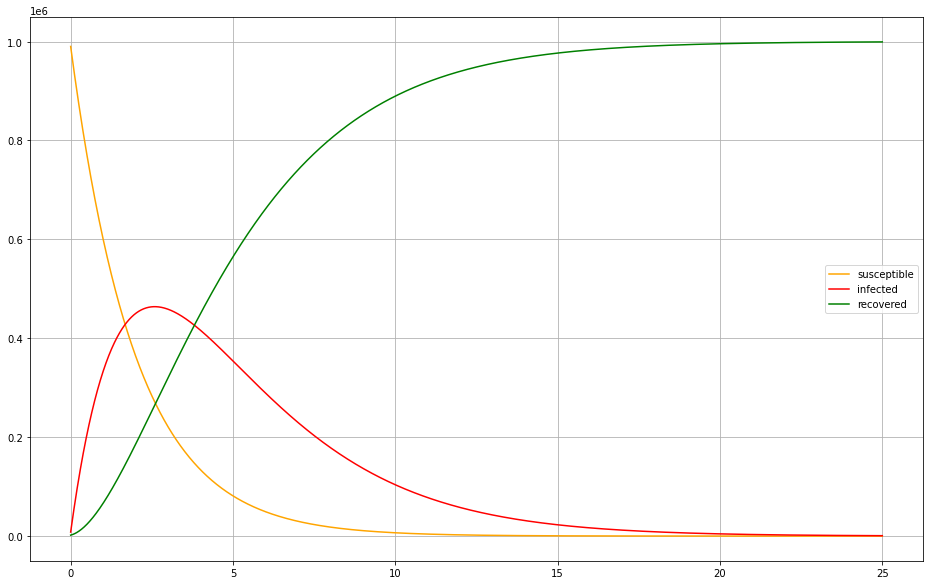

In [9]:
plt.rcParams["figure.figsize"] = (16, 10)
plt.grid()

plt.plot(t, func_s(t, apr_s[0], apr_s[1]), color='orange', label='susceptible')
plt.plot(t, func_i(t, apr_i[0], apr_i[1], apr_i[2]), color='red', label='infected')
plt.plot(t, func_r(t), color='green', label='recovered')

plt.legend()
plt.show()